In [19]:
import pandas as pd
import ast
import pandas_profiling
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_json("values_mdb-export.json",orient="records", lines=True)

df["timeStamp"] = df["timeStamp"].apply(lambda x: x["$date"]["$numberLong"])
df["timeStampMqttClient"] = df["timeStampMqttClient"].apply(lambda x: x["$date"]["$numberLong"])
df["_id"] = df["_id"].apply(lambda x: x["$oid"])
df["valueStatus"] = df["valueStatus"].apply(lambda x: x["$numberInt"])
df["value_number"] = df["value_number"].apply(lambda x: list(x.values())[0])
df.head()

,Error,ValueID,ValueUnit,_id,channelId,componentID,machineID,machineStatusList,statusID,statusIsMachine,statusTyp,timeStamp,timeStampMqttClient,value,valueStatus,value_number
0,0,12430012063.Main_Spindle.Actual_Power,%,5dc516968e15b329dc1341f3,Channel1,12430012063.Main_Spindle,12430012063,NaN,0,False,GREEN,1573197461887,1573197437715,0.0,0,0
1,0,12430012063.Main_Spindle.Actual_Speed_Rate,RPM,5dc516968e15b329dc1341f1,Channel1,12430012063.Main_Spindle,12430012063,NaN,0,False,GREEN,1573197461887,1573197437717,0.0,0,0
2,0,12430012063.Main_Spindle.Actual_Position_MCS,Grad,5dc516968e15b329dc1341f2,Channel1,12430012063.Main_Spindle,12430012063,NaN,0,False,GREEN,1573197461888,1573197437728,360.0,0,360
3,0,12430012063.Main_Spindle.MPC_Veff_Total,mm/s,5dc516968e15b329dc1341f5,Channel1,12430012063.Main_Spindle,12430012063,NaN,0,False,GREEN,1573197461890,1573197437715,0.0,0,0
4,0,12430012063.C1_Axis.Actual_Power,%,5dc516968e15b329dc1341ec,Channel1,12430012063.C1_Axis,12430012063,NaN,0,False,GREEN,1573197461891,1573197437715,0.0,0,0


In [8]:
# Achsleistung-2019-11-14T14-24-47.csv einlesen und aufbereiten

df2 = pd.read_csv("Achsleistung-2019-11-14T14-24-47.csv", sep=';')
df2.head()

,Timestamp,X1,Y1,Z1,C1,A1,SPI1,WZM,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,"2019-11-14T14:24:47,176",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"2019-11-14T14:24:47,188",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"2019-11-14T14:24:47,189",79.921,93.876,3450.010,1211.505,1186.133,1682.152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"2019-11-14T14:24:47,190",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"2019-11-14T14:24:47,192",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# MEAS_PROTOCOL_CSV_6.CSV einlesen und aufbereiten
df3 = pd.read_csv("MEAS_PROTOCOL_CSV_6.CSV", sep=';')
df3.rename(columns=lambda x: x.strip(), inplace=True)
df3["Measured"] = df3["Measured"].apply(lambda x: float(str(x).replace(',','.')))
df3["Setpoint"] = df3["Setpoint"].apply(lambda x: float(str(x).replace(',','.')))
df3["Difference"] = df3["Difference"].apply(lambda x: float(str(x).replace(',','.')))
columnsToStrip = ["Program", "Plane", "Measuring variant","Results:", "Unit"]
for curColumn in columnsToStrip:
    df3[curColumn] = df3[curColumn].apply(lambda x: x.strip())
df3.head()


,Unnamed: 0,Date,Time,Program,Workpiece no.,Testpoint,Plane,Probe no.,Cycle,S_MVAR,Measuring variant,Results:,Setpoint,Measured,Difference,Unit
0,1.0,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,15.000,14.999,-0.001,mm
1,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.996,-0.004,mm
2,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Diameter,12.014,12.019,0.005,mm
3,2.0,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,30.000,29.999,-0.001,mm
4,NaN,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.998,-0.002,mm


In [13]:
# test_data_set_1.csv einlesen und aufbereiten
# test_data_set_[2/xy/z].csv sind gleich aufgebaut und können mit dem gleichen Befehl eingelesen werden
df4 = pd.read_csv("test_data_set_1.csv", sep=',', header=6)
df4.head()

,Zeitstempel,NC-Programm,Werkzeug,MPC Lager [mG],MPC Spitze [%],MPC Veff Gesamt [mm/s],Axialkraft Druck [kN],Axialkraft Zug [kN],Biegemoment Werkzeug [Nm]
0,2019.11.14 14:20:00.086,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
1,2019.11.14 14:20:00.548,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
2,2019.11.14 14:20:01.456,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
3,2019.11.14 14:20:02.080,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
4,2019.11.14 14:20:06.011,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.4,2


In [2]:
# valuesncprogram.json einlesen und aufbereiten

df5 = pd.read_json("values_mdb-export.json",orient="records", lines=True)
df5["_id"] = df5["_id"].apply(lambda x: x["$oid"])
df5["timeStamp"] = df5["timeStamp"].apply(lambda x: x["$date"]).apply(lambda x: x["$numberLong"])
df5["valueStatus"] = df5["valueStatus"].apply(lambda x: x["$numberInt"])
df5["value_number"] = df5["value_number"].apply(lambda x: list(x.values())[0])
df5["timeStampMqttClient"] = df5["timeStampMqttClient"].apply(lambda x: x["$date"]).apply(lambda x: x["$numberLong"])

In [79]:
dfX = df5.loc[lambda x: x["ValueID"]=="12430012063.X1_Axis.Actual_Position_MCS", ["ValueID","value","timeStamp"] ].sort_values(by=["timeStamp"])
dfY = df5.loc[lambda x: x["ValueID"]=="12430012063.Y1_Axis.Actual_Position_MCS", ["ValueID", "value","timeStamp"]].sort_values(by=["timeStamp"])


In [80]:
print(dfX.shape)
print(dfY.shape)
dfY.head()

(14310, 3)
(10304, 3)


,ValueID,value,timeStamp
749,12430012063.Y1_Axis.Actual_Position_MCS,-617.85,1573197720954
770,12430012063.Y1_Axis.Actual_Position_MCS,-546.62,1573197721145
784,12430012063.Y1_Axis.Actual_Position_MCS,-475.38,1573197721291
800,12430012063.Y1_Axis.Actual_Position_MCS,-404.15,1573197721493
816,12430012063.Y1_Axis.Actual_Position_MCS,-332.92,1573197721687


In [84]:
stellen = 2 # wie viele stellen sollen abgeschnitten werden
dfXBinned = dfX
dfYBinned = dfY
dfXBinned['timeStamp'] = dfXBinned['timeStamp'].apply(lambda x: int(x)-(int(x)%(10**stellen)))
dfYBinned['timeStamp'] = dfYBinned['timeStamp'].apply(lambda x: int(x)-(int(x)%(10**stellen)))

In [85]:
print(dfXBinned.shape)
dfXgrp = dfXBinned.groupby(by="timeStamp").mean()
dfXgrp.rename(columns={"value":"X"}, inplace = True)
print(dfXgrp.shape)
dfXgrp.head()

(14310, 3)
(14049, 1)


,X
timeStamp,
1573197462900,1.56
1573197509000,1.55
1573197509800,1.56
1573197510600,1.55
1573197720900,36.11


In [86]:
print(dfYBinned.shape)
dfYgrp = dfYBinned.groupby(by="timeStamp").mean()
dfYgrp.rename(columns={"value":"Y"}, inplace=True)
print(dfYgrp.shape)
dfYgrp.head()

(10304, 3)
(10101, 1)


,Y
timeStamp,
1573197720900,-617.85
1573197721100,-546.62
1573197721200,-475.38
1573197721400,-404.15
1573197721600,-332.92


In [87]:
joined = dfXgrp.join(dfYgrp, how='inner')
print(joined.shape)

(6048, 2)


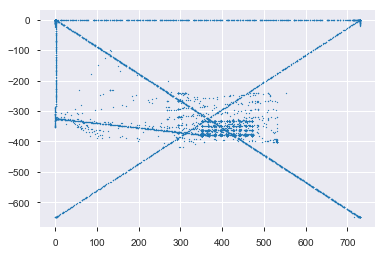

In [88]:
plt.scatter(joined["X"],joined['Y'], s=1.0)
plt.show()